# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Explorando datos

In [2]:
path="/content/drive/MyDrive/CESMAG 2023-B/Sexto/Grupo A/Descenso del gradiente/Copia de PreciosCasa.xlsx"
df=pd.read_excel(path)

In [3]:
df

superficie         precio  Unnamed: 2  700  -125
0          101   68241.016501         NaN  NaN   NaN
1          186  131784.763231         NaN  NaN   NaN
2          173  129071.372558         NaN  NaN   NaN
3           66   54505.343441         NaN  NaN   NaN
4          215  141123.268517         NaN  NaN   NaN
5          170  120350.905155         NaN  NaN   NaN
6           62   47188.055161         NaN  NaN   NaN
7          167  130204.917850         NaN  NaN   NaN
8          108   64333.066087         NaN  NaN   NaN
9          146   89320.143670         NaN  NaN   NaN
10         161  123865.852641         NaN  NaN   NaN
11          85   56276.507018         NaN  NaN   NaN
12          82   64380.806076         NaN  NaN   NaN
13          89   62052.296078         NaN  NaN   NaN
14         108   68420.100038         NaN  NaN   NaN
15          72   60580.552572         NaN  NaN   NaN
16         136   92987.298862         NaN  NaN   NaN
17          63   45500.126863         NaN  NaN   NaN
18         195  146504.231070         NaN  NaN   NaN
19         201  135837.622583         NaN  NaN   NaN
20         215  165283.726473         NaN  NaN   NaN
21         140   98800.931997         NaN  NaN   NaN
22         157  121618.779373         NaN  NaN   NaN
23          88   54121.975538         NaN  NaN   NaN
24         104   61204.771965         NaN  NaN   NaN
25         210  150707.384899         NaN  NaN   NaN
26         110   85860.328504         NaN  NaN   NaN
27         191  124575.542175         NaN  NaN   NaN
28         138   88210.133063         NaN  NaN   NaN
29         189  121802.891282         NaN  NaN   NaN

# Conjuntos de características y objetivo

In [4]:
X=df.iloc[:,0:2]
X.shape

(30, 2)

In [5]:
## Limpieza de datos Nan
X.dropna(inplace=True)
X.shape

(30, 2)

In [6]:
y=X.pop('precio')
X

superficie
0          101
1          186
2          173
3           66
4          215
5          170
6           62
7          167
8          108
9          146
10         161
11          85
12          82
13          89
14         108
15          72
16         136
17          63
18         195
19         201
20         215
21         140
22         157
23          88
24         104
25         210
26         110
27         191
28         138
29         189

In [7]:
y

0      68241.016501
1     131784.763231
2     129071.372558
3      54505.343441
4     141123.268517
5     120350.905155
6      47188.055161
7     130204.917850
8      64333.066087
9      89320.143670
10    123865.852641
11     56276.507018
12     64380.806076
13     62052.296078
14     68420.100038
15     60580.552572
16     92987.298862
17     45500.126863
18    146504.231070
19    135837.622583
20    165283.726473
21     98800.931997
22    121618.779373
23     54121.975538
24     61204.771965
25    150707.384899
26     85860.328504
27    124575.542175
28     88210.133063
29    121802.891282
Name: precio, dtype: float64

## Grafica

Text(0, 0.5, 'Precio')

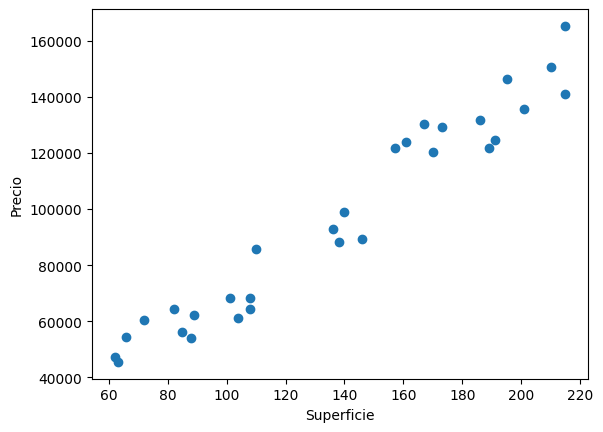

In [8]:
plt.scatter(X,y)
plt.xlabel('Superficie')
plt.ylabel('Precio')

## Descenso del gradiente

$L=\frac{1}{N} ∑ (y-\hat{y})^2$ <br/>
$\frac{\partial{L}}{\partial{w}}=\frac{-2}{N}∑ (y-(wx+b))*x$ <br/>
$\frac{\partial{L}}{\partial{b}}=\frac{-2}{N}∑ (y-(wx+b))$ <br/>

## Update Ruele
$w=w-lr\frac{\partial{L}}{\partial{w}}$
$b=b-lr\frac{\partial{L}}{\partial{b}}$

In [9]:
X.shape[0]
N=X.shape[0]


In [10]:
X=np.array(X)
y=np.array(y)
y=y.reshape((-1,1))


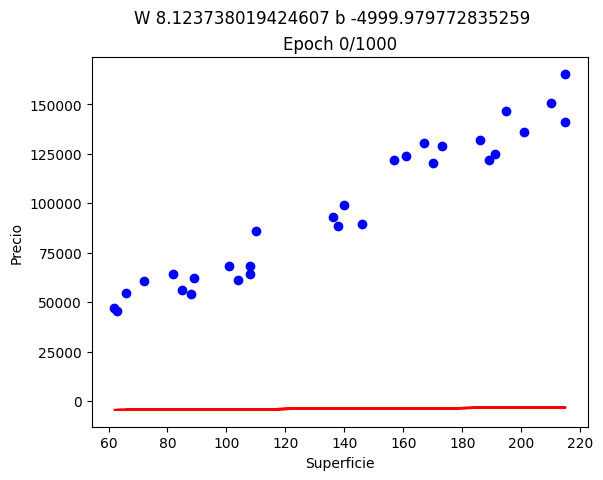

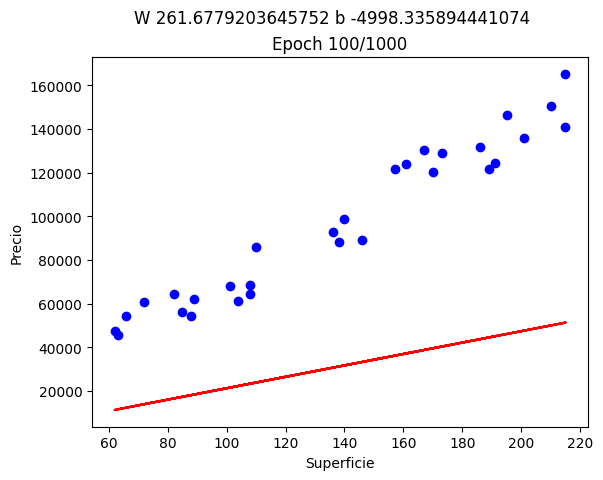

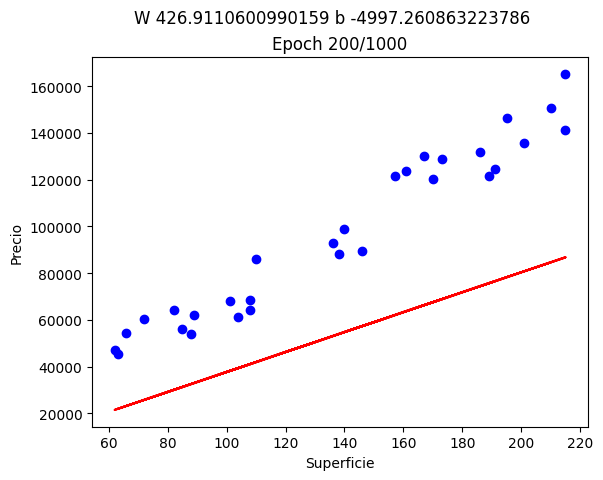

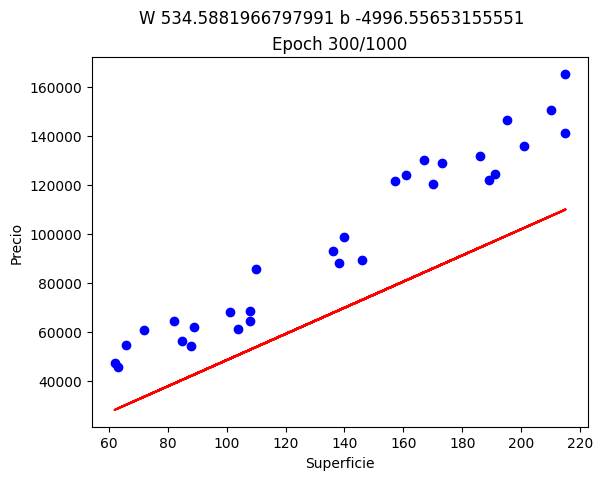

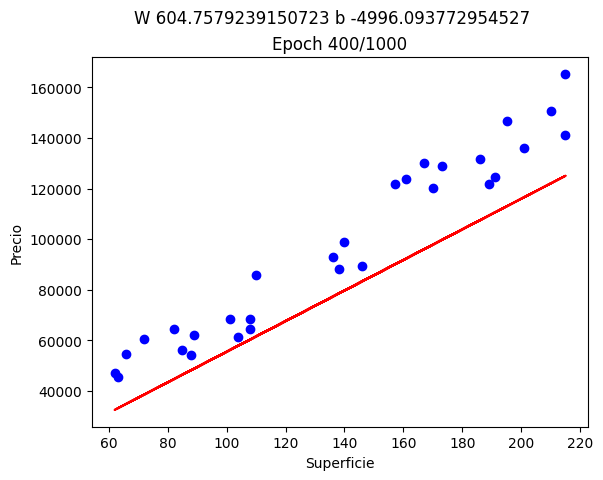

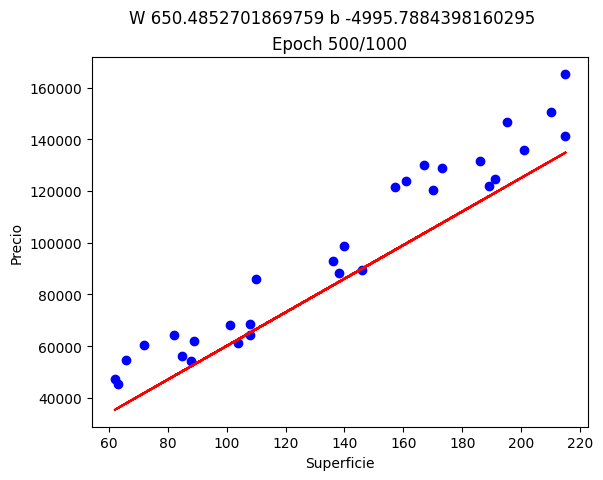

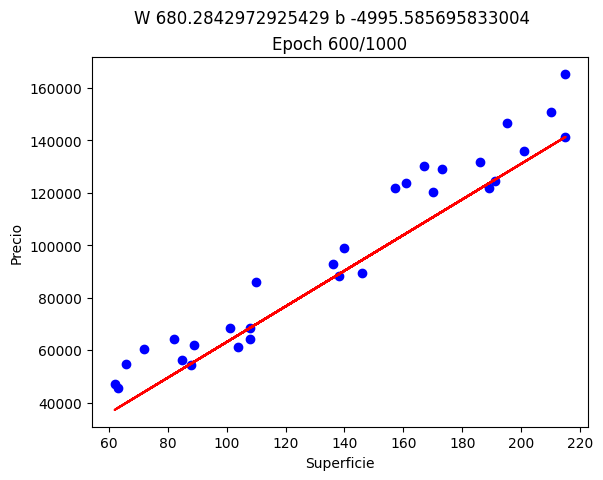

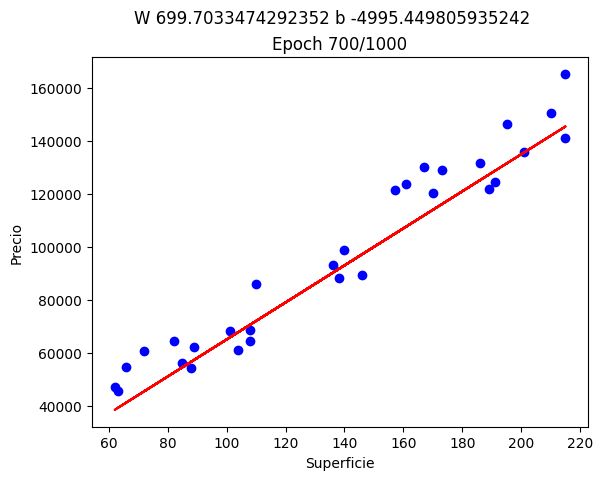

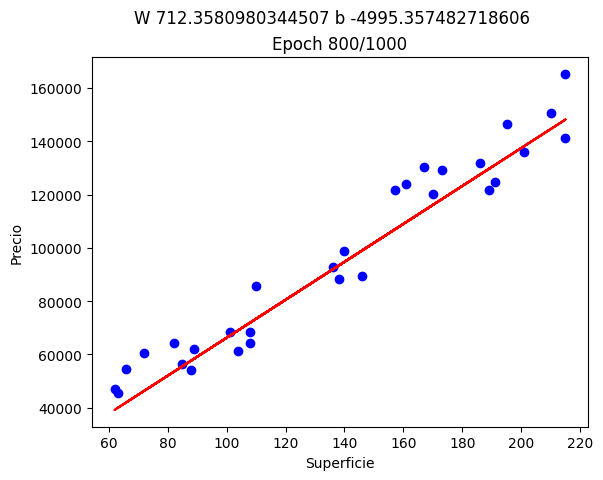

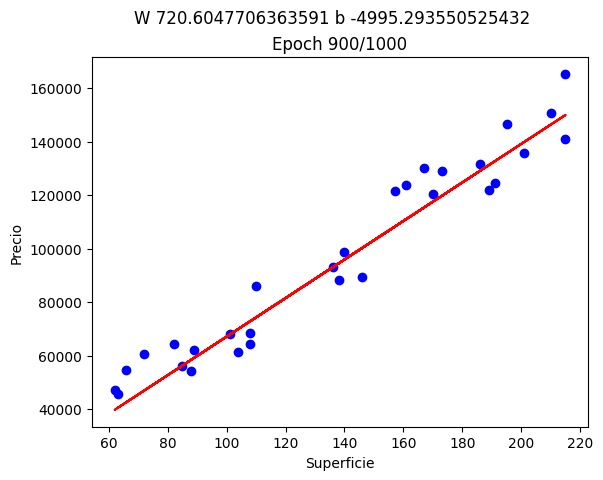

In [11]:
# Inicialización de parámetros
## Vectores para almacenar los parámetros w y b
ws=[]
bs=[]
##
w=5
b=-5000
# hiperparámetro para iteraciones
epoch=1000
# paso o ratio de aprendizaje
lr=0.0000001

for i in range(0,epoch):
  # Update Rule
  dw=-2/N*np.sum((y-(w*X+b))*X)
  db=-2/N*np.sum((y-(w*X+b)))
  w=w-lr*dw
  b=b-lr*db
  if i%100==0:
    ws.append(w)
    bs.append(b)
    plt.scatter(X,y,c='blue')
    plt.title("Epoch "+str(i)+"/"+str(epoch))
    plt.suptitle("W "+str(w)+" b "+str(b))
    plt.xlabel('Superficie')
    plt.ylabel('Precio')
    yp=w*X+b
    plt.plot(X,yp,c='red')
    plt.show()



In [12]:
ws

[8.123738019424607,
 261.6779203645752,
 426.9110600990159,
 534.5881966797991,
 604.7579239150723,
 650.4852701869759,
 680.2842972925429,
 699.7033474292352,
 712.3580980344507,
 720.6047706363591]

# Animación

In [13]:
# se utiliza el módulo animation y el módulo rc de matplotlib
from matplotlib import animation,rc
# módulo HTML de la biblioteca Ipython en su módulo display
# Para poder visualizar en colab animaciones o recursos
from IPython.display import HTML

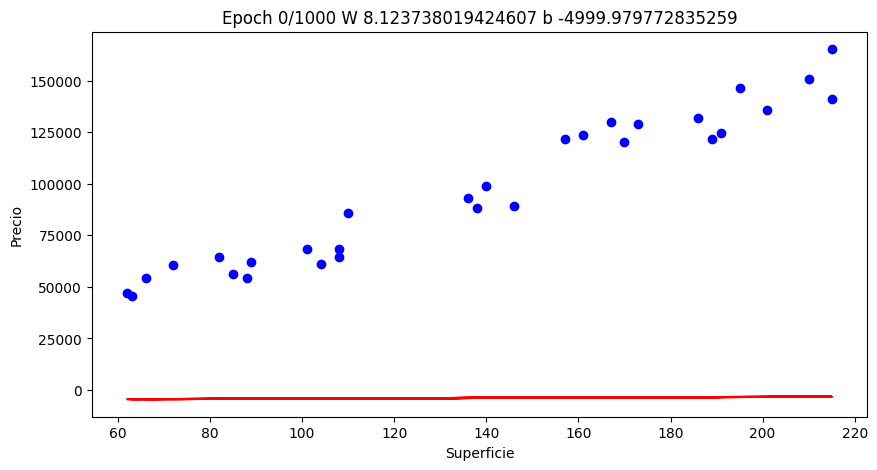

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

def update(i):
  w=ws[i]
  b=bs[i]
  # borrado del dibujo
  ax.clear()
  # dibujar como va la predicción
  ax.scatter(X,y,c='blue')
  ax.set_title("Epoch "+str(i)+"/"+str(epoch)+" W "+str(w)+" b "+str(b))
  ax.set_xlabel('Superficie')
  ax.set_ylabel('Precio')
  # Predicción
  yp=w*X+b
  # dibujo de la curva de mejor ajuste
  ax.plot(X,yp,c='red')

# Función que crea una animación
# fig=figura extraida del plot
# update=generador (función) la que realiza la animación
# frames= numero de imagenes que contendrá la animación
anim = animation.FuncAnimation(fig, update, frames = len(ws))

rc('animation', html='jshtml')
anim

## Ejercicio Bonificación 0.8 Taller 1

1. Realizar una animación del descenso del gradiente para los datos de Boston Housing donde X=lstat y=medv 0.3

2. Colocar en cada frame el error cuadrático medio 0.1

3. Realizar el algoritmo del descenso del gradiente para todas la variables de Boston 0.4

In [15]:
pathb="/content/drive/MyDrive/CESMAG 2023-B/Sexto/Grupo A/Descenso del gradiente/BostonHousing.csv"
dfb=pd.read_csv(pathb)
dfb

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  medv  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14  21.6  
2       17.8  392.83   4.03  34.7  
3       18.7  394.63   2.94  33.4  
4       18.7  396.90   5.33  36.2  
..       ...     ...    ...   ...  
501     21.0  391.99   9.67  22.4  
502     21.0  396.90   9.08  20.6  
503     21.0  396.90   5.64  23.9  
504     21.0  393.45   6.48  22.0  
505     21.0  396.90   7.88  11.9  

[506 rows x 14 columns]

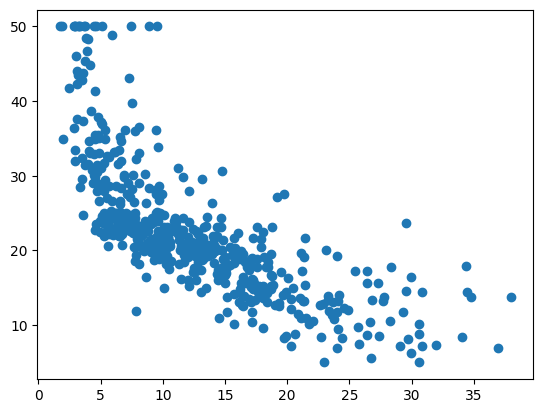

In [16]:
plt.scatter(dfb['lstat'],dfb['medv'])

In [22]:
X=np.array(dfb['lstat'])
y=np.array(dfb['medv'])
X.shape,y.shape

((506,), (506,))

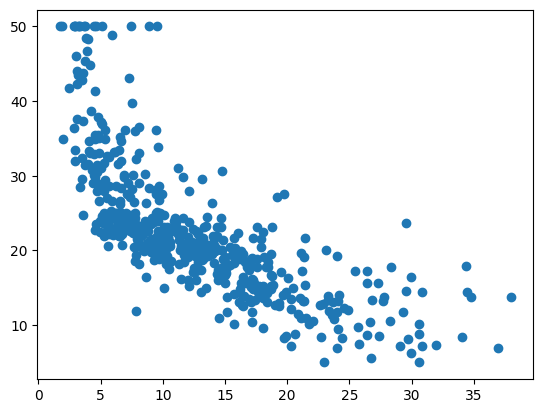

In [27]:
plt.scatter(X,y)

In [30]:
# Inicialización de parámetros
## Vectores para almacenar los parámetros w y b
ws=[]
bs=[]
##
w=0
b=0
# hiperparámetro para iteraciones
epoch=10000
# paso o ratio de aprendizaje
lr=0.0001

for i in range(0,epoch):
  # Update Rule
  dw=-2/N*np.sum((y-(w*X+b))*X)
  db=-2/N*np.sum((y-(w*X+b)))
  w=w-lr*dw
  b=b-lr*db
  if i%100==0:
    ws.append(w)
    bs.append(b)



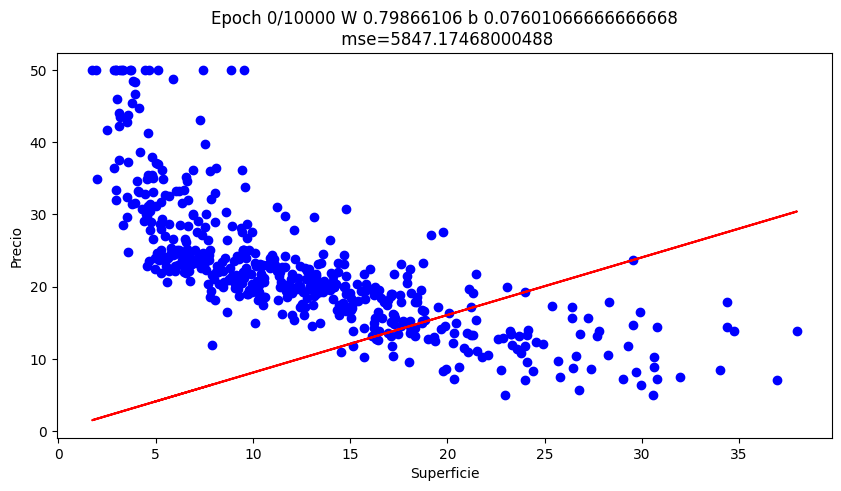

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))

def update(i):
  w=ws[i]
  b=bs[i]
  # borrado del dibujo
  ax.clear()
  # dibujar como va la predicción
  ax.scatter(X,y,c='blue')
  ax.set_ylabel('Precio')
  # Predicción
  yp=w*X+b
  mse=1/N*np.sum((y-yp)**2)
  ax.set_title("Epoch "+str(i*100)+"/"+str(epoch)+" W "+str(w)+" b "+str(b)+"\n mse="+str(mse))
  ax.set_xlabel('Superficie')

  # dibujo de la curva de mejor ajuste
  ax.plot(X,yp,c='red')

# Función que crea una animación
# fig=figura extraida del plot
# update=generador (función) la que realiza la animación
# frames= numero de imagenes que contendrá la animación
anim = animation.FuncAnimation(fig, update, frames = len(ws))

rc('animation', html='jshtml')
anim